# 1. Read your exported json file from the data folder

In [ ]:
import json

file_path = "data/coffee_shops.json"  
with open(file_path, "r") as file:
    coffee_shops = json.load(file)

print(coffee_shops)


[{'name': 'Starbucks', 'latitude': 38.71449, 'longitude': -9.140825}, {'name': 'Starbucks', 'latitude': 38.710633, 'longitude': -9.13938}, {'name': 'Starbucks', 'latitude': 38.712352, 'longitude': -9.13872}, {'name': 'Starbucks', 'latitude': 38.770219, 'longitude': -9.128875}, {'name': 'Starbucks', 'latitude': 38.728264, 'longitude': -9.218769}, {'name': 'Starbucks ECI Lisboa', 'latitude': 38.733857, 'longitude': -9.153991}, {'name': 'Starbucks', 'latitude': 38.771343, 'longitude': -9.130866}, {'name': 'Starbucks', 'latitude': 38.768788, 'longitude': -9.095998}, {'name': 'Starbucks', 'latitude': 38.714539, 'longitude': -9.140885}, {'name': 'Starbucks', 'latitude': 38.71449, 'longitude': -9.140825}, {'name': 'Café da Garagem', 'address': 'Rua Costa Castelo 75, 1100-178 Lisboa'}, {'name': 'Damas', 'address': 'Rua da Voz do Operário 60, 1070-087 Lisboa'}, {'name': 'Copenhagen Coffee Lab', 'address': 'Escolas Gerais, 34, 1100-213 Lisboa'}, {'name': 'Pastelaria Santo António', 'address': 'R

# 2. Plot a map with the coffee shops

In [23]:
import geopandas as gdp
from cartoframes.viz import Map, Layer, popup_element

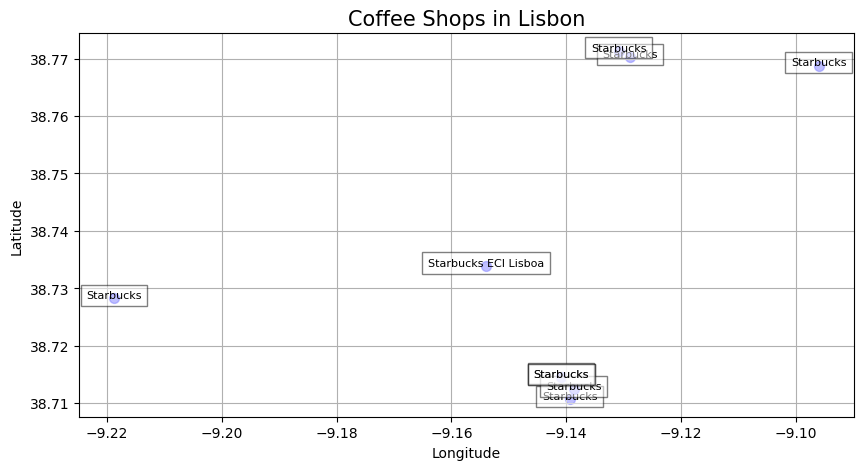

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_shops = [
    shop for shop in coffee_shops if "latitude" in shop and "longitude" in shop
]

geometry = [Point(shop["longitude"], shop["latitude"]) for shop in filtered_shops]
gdf = gpd.GeoDataFrame(filtered_shops, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="blue", alpha=0.5, markersize=50)

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["name"]):
    ax.text(x, y, label, fontsize=8, color="black", ha="center", bbox=dict(facecolor="white", alpha=0.5))

plt.title("Coffee Shops in Lisbon", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


After pushing, view your own notebook on [nbviewer](https://nbviewer.org/)